In [1]:
# Import the packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset from a CSV file named sample_dataset.csv into a Pandas DataFrame. Display the first few rows of the dataset.

data = pd.read_csv('sample_dataset.csv')
print(data.head())

   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


In [3]:
# Generate summary statistics for this dataset. What are the mean and standard deviation of the Sepal Length?
mean = data['Sepal Length (cm)'].mean()
std = data['Sepal Length (cm)'].std()
print(f"Mean: {mean:.2f}, Standard Deviation: {std:.2f}")

Mean: 5.91, Standard Deviation: 0.87


In [4]:
# Check for any missing values in the dataset. How would you handle them if there were any?
missing_values = data.isnull().sum()
if missing_values.any():
    print("Missing values in the dataset:")
    print(missing_values)

In [5]:
# Convert the species labels to numerical values using a mapping dictionary. For example, map 'FlowerA' to 0, 'FlowerB' to 1, and 'FlowerC' to 2.

species_mapping = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}

# Apply the mapping to the 'Species' column
data['Species'] = data['Species'].map(species_mapping)


In [6]:
# Split the dataset into training and testing sets with 70% training data and 30% testing data. Ensure that the split is stratified based on the species.
X = data.drop('Species', axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [7]:
# Train a decision tree classifier on the training data. What parameters would you use for the decision tree?
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

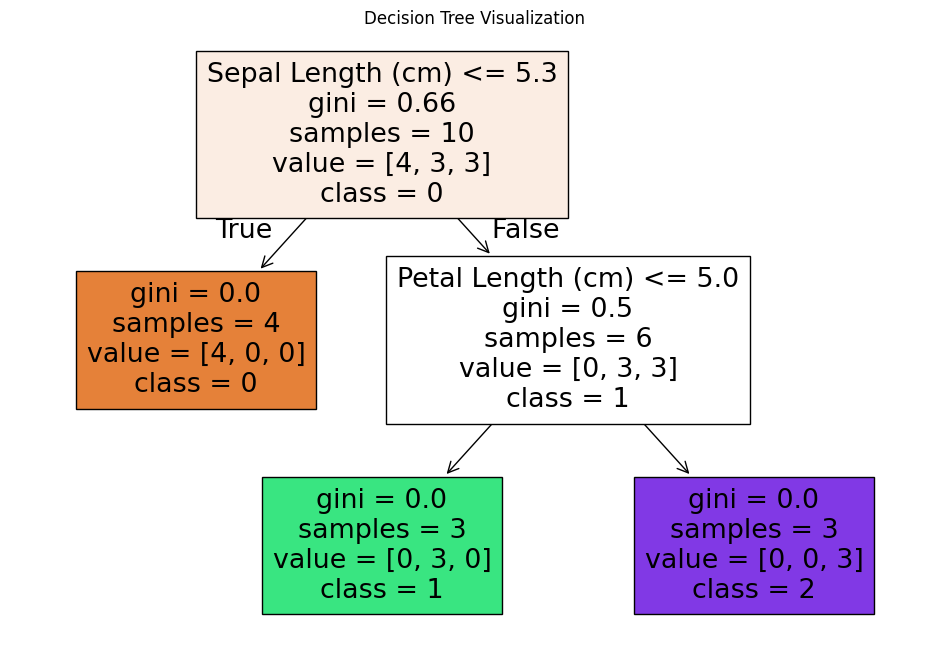

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is already trained
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=data['Species'].unique().astype(str))
plt.title("Decision Tree Visualization")
plt.show()

In [14]:
# Predict the species for the testing data and compute the accuracy.
# Predict the species for the testing data
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [15]:
# Generate a classification report and a confusion matrix for the predictions.
# Generate the classification report
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



NameError: name 'confusion_matrix' is not defined